## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [23]:
df[df['converted']== 1]['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [3]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [4]:
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

In [5]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [8]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [9]:
df2[(df2['user_id'].duplicated(keep=False)) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [6]:
df2[(df2['user_id'].duplicated(keep=False)) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [7]:
df2 = df2.drop([2893])

In [8]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [9]:
len(df2[df2['converted']== 1]) / len(df2['converted'])

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [10]:
convert_old = len(df2[(df2['converted']== 1) & (df2['group'] == 'control')]) / len(df2[df2['group'] == 'control'])
convert_old

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [11]:
convert_new = len(df2[(df2['converted']== 1) & (df2['group'] == 'treatment')]) / len(df2[df2['group'] == 'treatment'])
convert_new

0.11880806551510564

In [12]:
obs_diff = convert_new - convert_old
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [60]:
len(df2[df2['landing_page'] == 'new_page']) / len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

We don't have sufficient evidence to say that the new treatment page leads to more conversions, as we observe that the conversion rate for the control group (12.04%) is even bigger than the treatment's conversion rate (11.88%). 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$H_0: p_{old} \geq p_{new}$$


$$H_1: p_{old} < p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [13]:
p_new_null = len(df2[df2['converted']== 1]) / len(df2['converted'])
p_new_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? 

In [16]:
p_old_null = p_new_null
p_old_null

0.11959708724499628

c. What is $n_{new}$?

In [19]:
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$?

In [20]:
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# https://knowledge.udacity.com/questions/411761

new_page_converted = np.random.binomial(1, p_new_null, n_new)
new_page_converted.mean()

0.12005367834285322

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(1, p_old_null, 145274)
old_page_converted.mean()

0.12133623359995595

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff_null = new_page_converted.mean() - old_page_converted.mean()
diff_null

-0.0012825552571027327

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new_null, 145310)
    old_page_converted = np.random.binomial(1, p_old_null, 145274)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

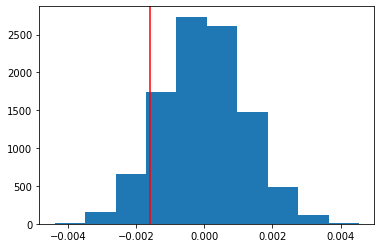

In [27]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs > obs_diff).mean()

0.9026

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed in part j is called "p-value" in scientific studies. The p-value is the probability of observing our statistic, or more extreme values in favor of the alternative (greater in this case), if the null is true. A small p-value (small probability) means it is unlikely the we will observe our statistic from the null, and more likely it came from the alternative. As we see a very large p-value of 0.90, we fail to reject the null hypothesis. In other words, we accept that conversion rate of the old page is equal or bigger than the conversion rate of the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

# Here I need the absolute values, not the proportion!

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

# p-value > 0.05, we fail to reject the null

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**They also mean that we fail to reject the null. Therefore, the conversion rate for the old page is bigger or equal to the new page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression (binary predicted variable)**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [106]:
df2.head(5)

,user_id,timestamp,treatment,ab_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,0,0,1,1


In [38]:
df2['intercept']  = 1

In [39]:
df2['group'].replace({'control':0, 'treatment':1},inplace=True)

In [40]:
df2.rename(columns={'group': 'treatment'}, inplace = True)

In [41]:
df2['landing_page'].replace({'old_page':0, 'new_page':1},inplace=True)

In [42]:
df2.rename(columns={'landing_page': 'ab_page'}, inplace = True)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
X = df2[['intercept', 'ab_page']]
y = df2['converted']
log_reg = sm.Logit(y, X)
res = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        22:31:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190. That differs from the value found in Part ll because here the null hypothesis of our regression model for each variable in ANOVA (analysis of variables) is that there's no correlation between changes in observed values of ab_pages and changes in our dependent variable (conversion rate), whilst in Part ll our null hypothesis is that the conversion rate of old page is bigger or equal to the new page's conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's a good idea to consider other factors into our regression model because there may be other variables that have an impact on changes observed in our dependent variable, and that change might be inflating another variable's coefficient (omitted-variable bias). Even though we consider to have a random sample and base our findings in that premisse, let's say there's a similar characteristic among users such as change aversion, nationality, or device category, age, which may have an impact on whether the user converted or not. Wouldn't it be great to analyze how these characteristics along with the difference in page (old or new) impact the conversion rate? We could even think about a personalized website, that would have a certain layout for a specific cluster and a different layout for another one. We could think about disadvantages to adding new variables into our model such as multicollinearity, which is the existence of a linear relationship among variables that can change a varible's coefficient signal or significance.**

https://en.wikipedia.org/wiki/Omitted-variable_bias <br/>
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [46]:
### Create the necessary dummy variables

df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [47]:
df_new.head(5)

,country,timestamp,treatment,ab_page,converted,intercept,CA,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,0,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,0,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,1,1,0,1,0,1,0


In [48]:
log_reg_1 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
res_1 = log_reg_1.fit()
print(res_1.summary())

# Remember that we need to exponentiate the coeffients to understand the impact of each variable on our dependent variable.

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:               2.323e-05
Time:                        22:31:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.

**It doesn't appear that country had an impact on conversion, as neither of the variables are statistically significant in a 95% confidence interval.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
df_new['ab_page_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_page_UK'] = df_new['ab_page'] * df_new['UK']
df_new.head(5)

,country,timestamp,treatment,ab_page,converted,intercept,CA,UK,US,ab_page_US,ab_page_UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,0,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,1,1,0,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,1,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,0,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,1,1,0,1,0,1,0,0,1


In [50]:
### Fit Your Linear Model And Obtain the Results

log_reg_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'ab_page_US', 'ab_page_UK']])
res_2 = log_reg_2.fit()
print(res_2.summary())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        22:31:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.

**None of our variables seem to be significant. Therefore, we cannot correlate the changes observed in our dependent variable to any of our independent variables.**

<a id='conclusions'></a>
>## Conclusions
>
> - We find that there's no significance in the correlation between changes in page (new, old) and changes in conversion rate, as well as a p-value of 0.9 for our A/B test, which states that we fail to reject the null hypothesis (old page has a bigger or equal conversion rate as the new page). 
> - When we included new variables such as country and the interaction between country and page, we also get insignificant coefficients.
> - We would have to analyze other variables such as date to understand if the conversion rate pattern is due to change aversion and time of access to understand if there's a better time of the day/week to invest on campaign ads. 